In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df_resultados = pd.read_csv('data/results.csv')

In [13]:
df_custos = pd.read_csv('data/custos_tsp.csv')

In [14]:
df_custos

,num_cidades,custo,tempo_execucao
0,2,82.962342,0.000724
1,3,172.066448,0.000321
2,4,193.198810,0.003448
3,5,197.760477,0.001096
4,6,216.379627,0.004604
...,...,...,...
69,71,672.127646,8.194216
70,72,680.346523,16.432077
71,73,684.981620,15.458668
72,74,693.199604,19.445827


In [15]:
df_custos.rename(columns={'num_cidades': 'n', 'tempo_execucao': 'tempo_guroby'}, inplace=True)

In [16]:
df=pd.merge(df_resultados, df_custos, on='n', how='left')
df

,seed,n,Método,Custo,Tempo (s),Gap (%),custo,tempo_guroby
0,42,3,Nearest Neighbor,172.066448,0.000009,NaN,172.066448,0.000321
1,42,3,Nearest Neighbor + 2-opt,172.066448,0.000116,NaN,172.066448,0.000321
2,42,3,Nearest Neighbor + 3-opt,172.066448,0.000107,NaN,172.066448,0.000321
3,42,3,Nearest Neighbor + Lin-Kernighan,172.066448,0.000019,NaN,172.066448,0.000321
4,42,3,Cheapest Insertion,172.066448,0.000016,NaN,172.066448,0.000321
...,...,...,...,...,...,...,...,...
871,42,75,Cheapest Insertion + Lin-Kernighan,717.970706,19.076956,NaN,693.360673,19.421182
872,42,75,Farthest Insertion,742.659435,0.012919,NaN,693.360673,19.421182
873,42,75,Farthest Insertion + 2-opt,741.670544,14.407830,NaN,693.360673,19.421182
874,42,75,Farthest Insertion + 3-opt,702.318591,133.066425,NaN,693.360673,19.421182


Text(0.5, 1.0, 'Comparação de Tempo de Execução do TSP: execução Gurobi')

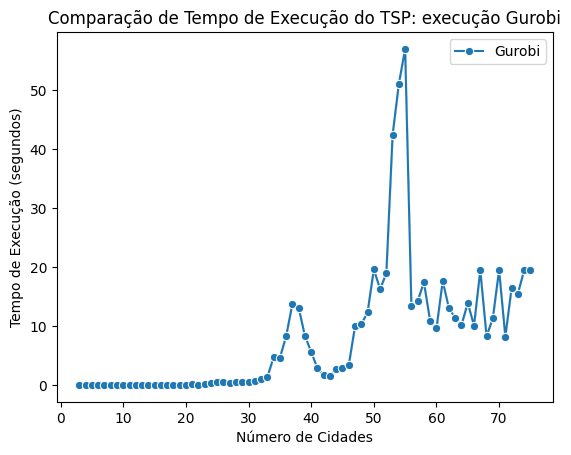

In [17]:
sns.lineplot(data=df, x='n', y='tempo_guroby', marker='o', label='Gurobi')
plt.ylabel('Tempo de Execução (segundos)')
plt.xlabel('Número de Cidades')
plt.title('Comparação de Tempo de Execução do TSP: execução Gurobi')

- - - 

# Heuristicas de Melhoria

In [18]:
df["Gap (%)"]= ((df["Custo"]-df["custo"])/df["custo"])*100
df

,seed,n,Método,Custo,Tempo (s),Gap (%),custo,tempo_guroby
0,42,3,Nearest Neighbor,172.066448,0.000009,0.000000,172.066448,0.000321
1,42,3,Nearest Neighbor + 2-opt,172.066448,0.000116,0.000000,172.066448,0.000321
2,42,3,Nearest Neighbor + 3-opt,172.066448,0.000107,0.000000,172.066448,0.000321
3,42,3,Nearest Neighbor + Lin-Kernighan,172.066448,0.000019,0.000000,172.066448,0.000321
4,42,3,Cheapest Insertion,172.066448,0.000016,0.000000,172.066448,0.000321
...,...,...,...,...,...,...,...,...
871,42,75,Cheapest Insertion + Lin-Kernighan,717.970706,19.076956,3.549384,693.360673,19.421182
872,42,75,Farthest Insertion,742.659435,0.012919,7.110118,693.360673,19.421182
873,42,75,Farthest Insertion + 2-opt,741.670544,14.407830,6.967495,693.360673,19.421182
874,42,75,Farthest Insertion + 3-opt,702.318591,133.066425,1.291957,693.360673,19.421182


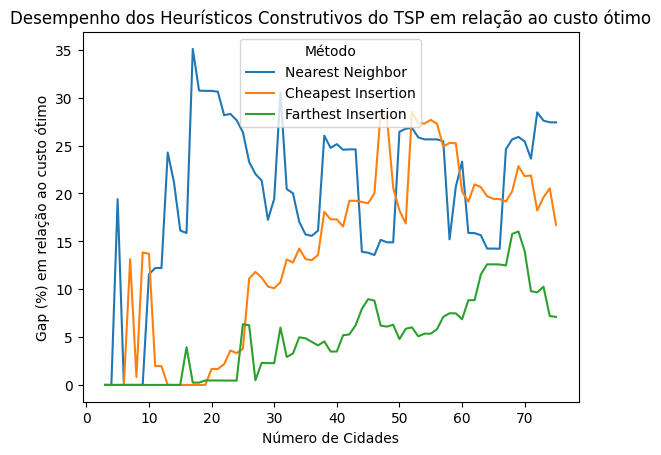

In [19]:
df_construtivas= df[df['Método'].isin(['Nearest Neighbor','Cheapest Insertion', 'Farthest Insertion'])]
sns.lineplot(data=df_construtivas, x='n', y='Gap (%)', hue='Método')
plt.ylabel('Gap (%) em relação ao custo ótimo')
plt.xlabel('Número de Cidades')
plt.title('Desempenho dos Heurísticos Construtivos do TSP em relação ao custo ótimo')
plt.show()

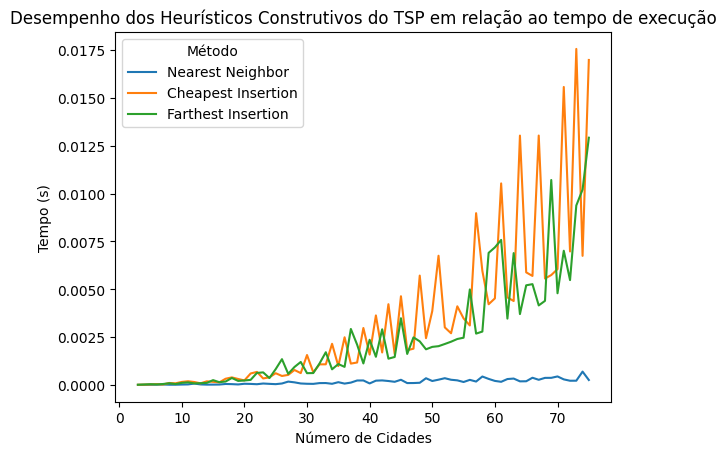

In [20]:
sns.lineplot(data=df_construtivas, x='n', y= "Tempo (s)", hue='Método')
plt.ylabel('Tempo (s)')
plt.xlabel('Número de Cidades')
plt.title('Desempenho dos Heurísticos Construtivos do TSP em relação ao tempo de execução')
plt.show()

- - -

# Adicionando as Melhorias

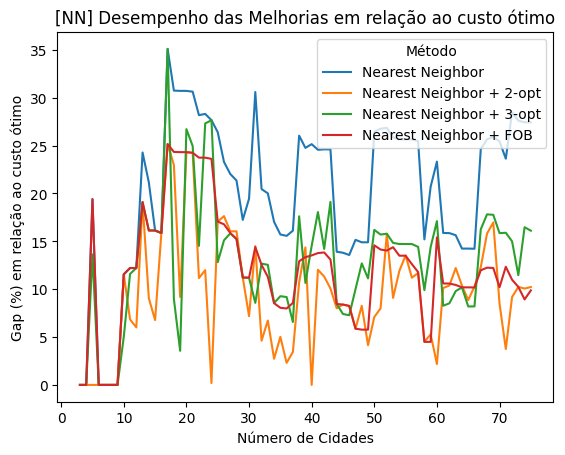

In [21]:
df_nn= df[df['Método'].isin(['Nearest Neighbor', "Nearest Neighbor + 2-opt", "Nearest Neighbor + 3-opt", "Nearest Neighbor + Lin-Kernighan"])]
df_nn.loc[df_nn["Método"] == "Nearest Neighbor + Lin-Kernighan", "Método"] = "Nearest Neighbor + FOB"
sns.lineplot(data=df_nn, x='n', y='Gap (%)', hue='Método')
plt.ylabel('Gap (%) em relação ao custo ótimo')
plt.xlabel('Número de Cidades')
plt.title('[NN] Desempenho das Melhorias em relação ao custo ótimo')
plt.show()

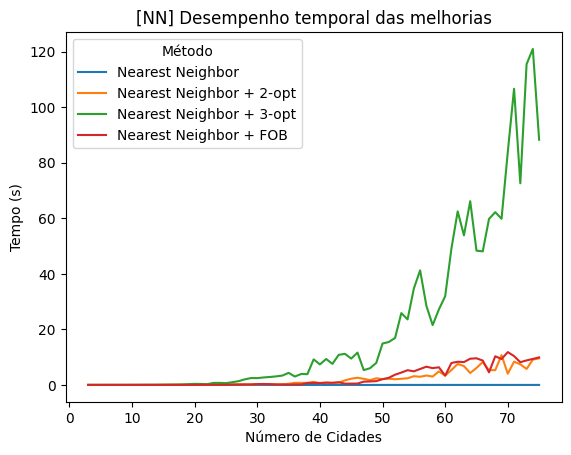

In [22]:
sns.lineplot(data=df_nn, x='n', y='Tempo (s)', hue='Método')
plt.ylabel('Tempo (s)')
plt.xlabel('Número de Cidades')
plt.title('[NN] Desempenho temporal das melhorias')
plt.show()

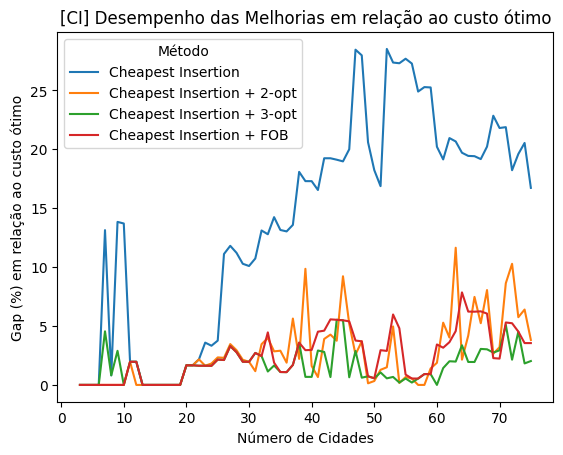

In [23]:
df_ci= df[df['Método'].isin(['Cheapest Insertion', "Cheapest Insertion + 2-opt", "Cheapest Insertion + 3-opt", "Cheapest Insertion + Lin-Kernighan"])]
df_ci.loc[df_ci["Método"] == "Cheapest Insertion + Lin-Kernighan", "Método"] = "Cheapest Insertion + FOB"
sns.lineplot(data=df_ci, x='n', y='Gap (%)', hue='Método')
plt.ylabel('Gap (%) em relação ao custo ótimo')
plt.xlabel('Número de Cidades')
plt.title('[CI] Desempenho das Melhorias em relação ao custo ótimo')
plt.show()

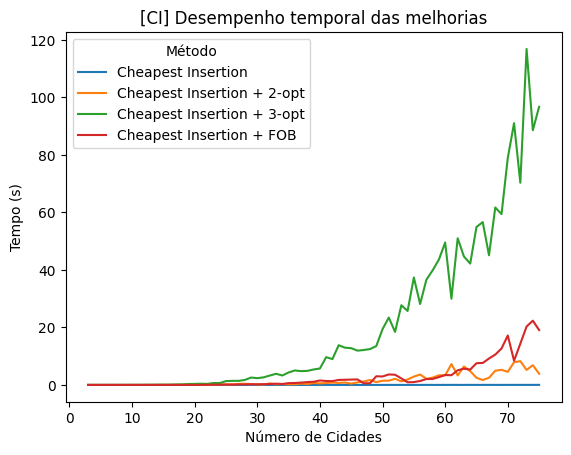

In [24]:
sns.lineplot(data=df_ci, x='n', y='Tempo (s)', hue='Método')
plt.ylabel('Tempo (s)')
plt.xlabel('Número de Cidades')
plt.title('[CI] Desempenho temporal das melhorias')
plt.show()

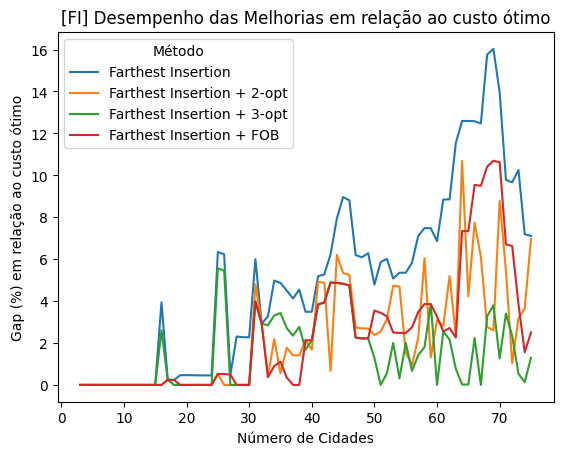

In [25]:
df_fi= df[df['Método'].isin(['Farthest Insertion', "Farthest Insertion + 2-opt", "Farthest Insertion + 3-opt", "Farthest Insertion + Lin-Kernighan"])]
df_fi.loc[df_fi["Método"] == "Farthest Insertion + Lin-Kernighan", "Método"] = "Farthest Insertion + FOB"
sns.lineplot(data=df_fi, x='n', y='Gap (%)', hue='Método')
plt.ylabel('Gap (%) em relação ao custo ótimo')
plt.xlabel('Número de Cidades')
plt.title('[FI] Desempenho das Melhorias em relação ao custo ótimo')
plt.show()

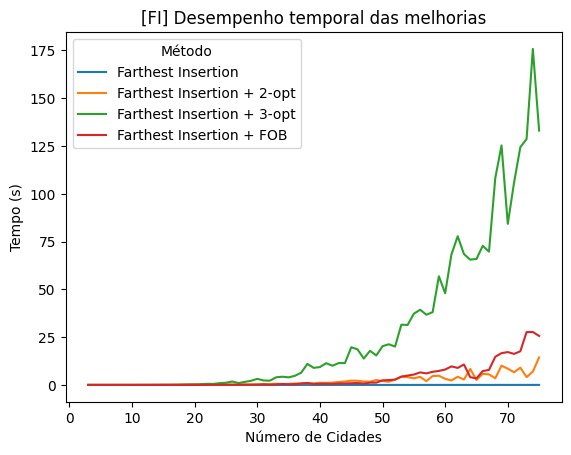

In [26]:
sns.lineplot(data=df_fi, x='n', y='Tempo (s)', hue='Método')
plt.ylabel('Tempo (s)')
plt.xlabel('Número de Cidades')
plt.title('[FI] Desempenho temporal das melhorias')
plt.show()

## Comparação entre os melhores modelos

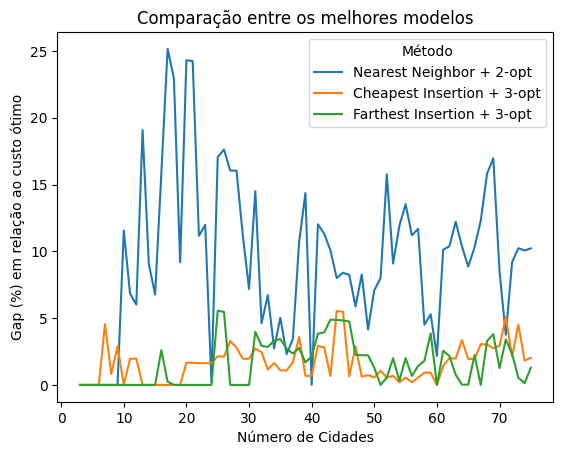

In [27]:
df_melhores= df[df['Método'].isin(['Nearest Neighbor + 2-opt', 'Cheapest Insertion + 3-opt', 'Farthest Insertion + 3-opt'])]
sns.lineplot(data=df_melhores, x='n', y='Gap (%)', hue='Método')
plt.ylabel('Gap (%) em relação ao custo ótimo')
plt.xlabel('Número de Cidades')
plt.title('Comparação entre os melhores modelos')
plt.show()

- - - 

# Análise sem perturbação de todos os ótimos encontrados em 1 iteração

In [28]:
import pandas as pd

In [29]:
df_1_2opt = pd.read_csv('data/grafico_1_interacao_2opt.csv')

In [30]:
df_1_2opt

,melhor_valor
0,617.427234
1,611.363422
2,595.832064
3,586.335862
4,582.705793
5,582.536133
6,569.778759
7,568.753478
8,568.495443


In [31]:
x= list(range(len(df_1_2opt)))

In [32]:
x

[0, 1, 2, 3, 4, 5, 6, 7, 8]

Text(0.5, 1.0, 'Evolução do Custo da Melhor Solução Encontrada - 2-opt ')

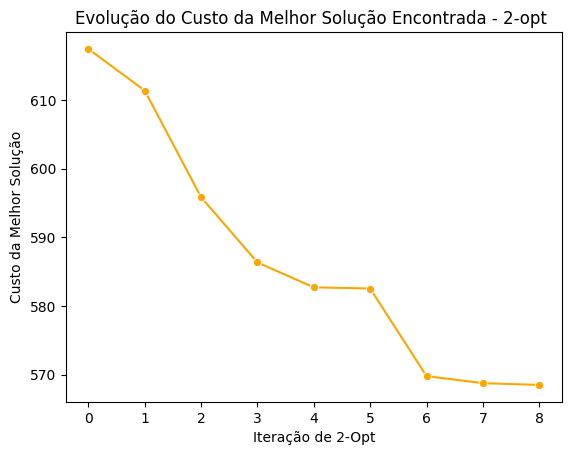

In [35]:
sns.lineplot(data = df_1_2opt, x=x, y='melhor_valor', marker='o', color='orange')
plt.ylabel('Custo da Melhor Solução')
plt.xlabel('Iteração de 2-Opt')
plt.title('Evolução do Custo da Melhor Solução Encontrada - 2-opt ')

Text(0.5, 1.0, 'Evolução do Custo da Melhor Solução Encontrada - 3-opt')

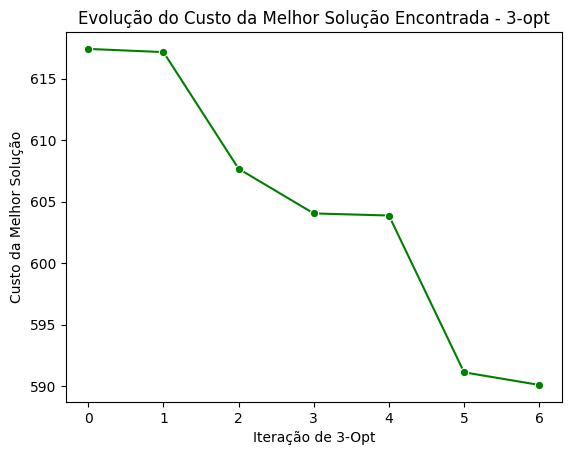

In [36]:
df_1_3opt = pd.read_csv('data/grafico_1_interacao_3opt.csv')
x = list(range(len(df_1_3opt)))
sns.lineplot(data = df_1_3opt, x=x, y='melhor_valor', marker='o', color='green')
plt.ylabel('Custo da Melhor Solução')
plt.xlabel('Iteração de 3-Opt')
plt.title('Evolução do Custo da Melhor Solução Encontrada - 3-opt')

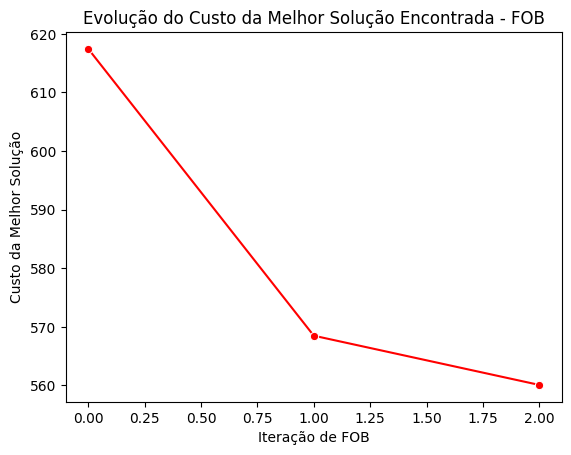

In [38]:
df_1_fob = pd.read_csv('data/grafico_1_interacao_fob.csv')
x = list(range(len(df_1_fob)))
sns.lineplot(data = df_1_fob, x=x, y='melhor_valor', marker='o', color='red')
plt.ylabel('Custo da Melhor Solução')
plt.xlabel('Iteração de FOB')
plt.title('Evolução do Custo da Melhor Solução Encontrada - FOB')
plt.show()